## 0 - Introduction

Welcome to the <span style="color:yellowgreen">Foundations of Machine Learning</span> (ECE5984_41) course!

This is the <span style="color:red">first</span> lab practice for this class. You will implement linear regression algorithm and apply it to the provided dataset.

### Outline
- [ 1 - Packages ](#1-packages)
- [ 2 - Problem Statement and Dataset ](#2-problem-statement-and-dataset)
- [ 3 - Linear Regression ](#3-linear-regression)
  - [ 3.1 Normal Equation ](#31-normal-equation) - Exercise 1
  - [ 3.2 Gradient Descent ](#32-gradient-descent) - Exercise 2, Exercise 3, Exercise 4

## 1. Packages 

You have to install and use below packages for your HW#1.
- [numpy](https://www.numpy.org): Fundamental package for matrix computation with python.
- [matplotlib](https://matplotlib.org): Package for visualization of graph with python.
- [pandas](https://pandas.pydata.org): Open source package for data analysis and manipulation.

**Do not use other machine learning packages in this homework, e.g., *tensorflow*, *pytorch*, *jax*, etc.**

In [4]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 2. Problem Statement and Dataset

### Problem Statement

[Student Marks Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

The dataset consists 100 samples of Marks(Grades) of students including their "study time" & "number of courses".

In this homework, we would like to fit the linear regression model on this dataset. For practice, we will only use "study time" attribute.

### Dataset

You will start by loading the dataset. Make sure the attached 'Student_Marks.csv' file is in your current directory path (can be downloaded from icampus).

Each column describes the below attributes:
- \[ time_study \]: Total hour the student has studied.
- \[ Marks \]: The final score the student has achieved.

Run below cells and take a look at the dataset!

In [5]:
# Load the dataset
dataset = pd.read_csv("./Student_Marks.csv")

# Display top 5 elements
dataset.head(5)

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [6]:
# check data type of each attributes
dataset.dtypes

time_study    float64
Marks         float64
dtype: object

In [7]:
# check dataset shape: (num data, num attributes)
dataset.shape

(100, 2)

The shape of data is (100,)
The shape of label is (100,)

The first Five elements of data are [4.508 0.096 3.133 7.909 7.811]
The first Five elements of label are [19.202  7.734 13.811 53.018 55.299]



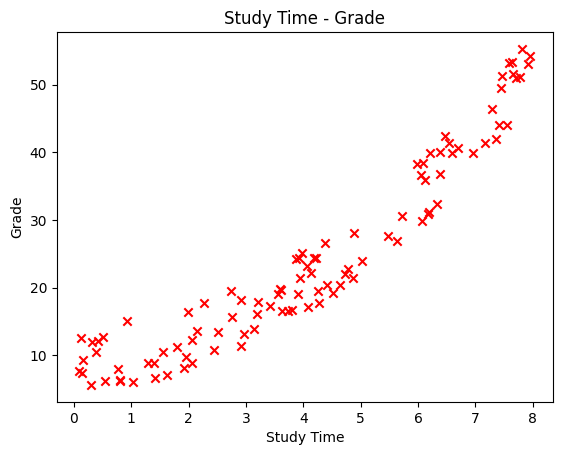

In [8]:
# Extract "Hours Studied" and "Performance Index" attributes. 
# Each attributes will be the data and label, respectively.
data = dataset["time_study"].to_numpy()
label = dataset["Marks"].to_numpy()

# Check data statistics
print("The shape of data is", data.shape)
print("The shape of label is", label.shape)
print()

print("The first Five elements of data are", data[:5])
print("The first Five elements of label are", label[:5])
print()

# Plot data
plt.scatter(data, label, marker='x', c='r')
plt.title("Study Time - Grade")
plt.xlabel("Study Time")
plt.ylabel("Grade")
plt.show()

## 3. Linear Regression

### 3.1 Normal Equation

### <span style="color:#ffd33d"> Exercise 1 </span>: Complete the code for the normal equation

In [9]:
# Complete the code for the normal equation
def normal_equation(data, label):
    """
    Directly compute optimal w* = (w, b) of the linear regression model
    
    Args:
        data    (np.ndarray): Shape (N, ) Input ot the model
        label   (np.ndarray): Shape (N, ) Label of the data
    
    Return:
        w       (np.ndarray): weight(slope) of the linear regression model
        b       (np.ndarray): bias of the linear regression model 
    """
    #[NOTE] write your from code here! 
    X = np.vstack([data, np.ones([1, data.shape[0]])]).T
    Y = np.reshape(label, (label.shape[0], 1))
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y 
    w = theta[0, 0]; b = theta[1, 0]
    return w, b

w, b = normal_equation(data, label)
print(f"w: {w:.6f}, b: {b:.6f}")

w: 5.688750, b: 1.223858


Plot your linear regression model and check if it works well

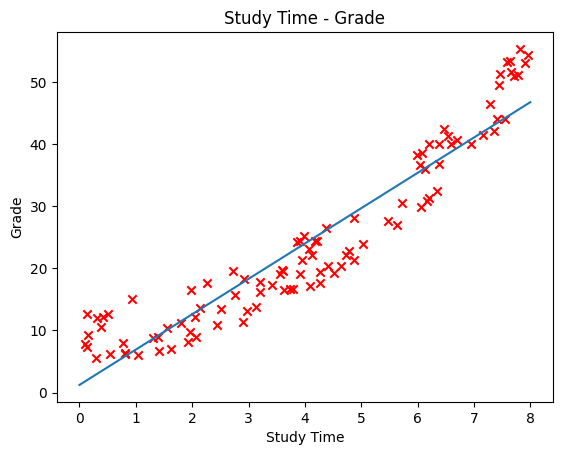

In [10]:
# Obtain weight and bias of your linear regression model
w, b = normal_equation(data, label)

# Plot data
plt.scatter(data, label, marker='x', c='r')
plt.title("Study Time - Grade")
plt.xlabel("Study Time")
plt.ylabel("Grade")

x_min, x_max = 0, math.ceil(max(data))
y_min, y_max = 0, math.ceil(max(label))

x = np.array([x_min, x_max])
y = w * x + b
plt.plot(x, y)

plt.show()


### 3.2 Gradient Descent

### <span style="color:#ffd33d"> Exercise 2 </span>: Complete the code for computing the loss(cost)

\> Here, the <span style="color:skyblue">compute_loss()</span> method computes the loss of the linear regression model. 

Feel free to change or add variables, but do not modify the method name and its arguements.

In [11]:
def compute_loss(data, label, w, b):
    """
    Compute the loss(cost) of the linear regression model, given data and label.

    Args:
        data    (np.ndarray): Shape (N, ) Input to the model
        label   (np.ndarray): Shape (N, ) Label of the data
        w       (float): Weight of the linear regression model
        b       (float): Bias of the linear regression model
    
    Return:
        total_loss (float): Total loss of the linear regression model, given data and label
    """
    total_loss = 0

    #[NOTE] write your code here!
    N = data.shape[0]
    predicted_label = w * data + b
    error = predicted_label - label
    total_loss = 0.5 * 1/N * np.sum(np.square(error)) 

    return total_loss


### <span style="color:#ffd33d"> Exercise 4 </span>: Complete the code for computing the gradient of the loss w.r.t weights and bias

\> Here, the <span style="color:skyblue">compute_gradient()</span> method computes the gradient of the loss with respect to the parameters of the linear regression model.

Feel free to change or add variables, but do not modify the method name and its arguments.

In [12]:
def compute_gradient(data, label, w, b):
    """
    Compute the loss(cost) of the linear regression model, given data and label.

    Args:
        data    (np.ndarray): Shape (N, ) Input to the model
        label   (np.ndarray): Shape (N, ) Label of the data
        w       (float): Weight of the linear regression model
        b       (float): Bias of the linear regression model
    
    Return:
       grad_w   (float): The gradient of the loss w.r.t weight w
       grad_b   (float): The gradient of the loss w.r.t bias b
    """
    grad_w, grad_b = 0, 0

    #[NOTE] write your code here!
    N = data.shape[0]
    X = np.vstack([data, np.ones([1, data.shape[0]])]).T
    Y = np.reshape(label, (label.shape[0], 1))
    theta = np.array([[w], [b]])
    grad_loss = 1/N * (X @ theta - Y).T @ X

    grad_w = grad_loss[0, 0]; grad_b = grad_loss[0, 1]
    return grad_w, grad_b

### <span style="color:#ffd33d"> Exercise 4 </span>: Complete the code of gradient descent algorithm

\> <span style="color:skyblue">gradient_descent()</span> method applies gradient descent on the given dataset. You should make 'loop' inside this method to iteratively update w and b. You __**must**__ use <span style="color:skyblue">compute_loss()</span> and <span style="color:skyblue">compute_gradient()</span> method to calculate loss and gradient, respectively.

Also, for the purpose of visualization of the training curve, this method returns some 'history' lists. You can just simply append updated values to the corresponding 'history' list.

Feel free to change or add variables, but do not modify the method name, its arguments, and return values.

In [65]:
def gradient_descent(data, label, w_init, b_init, iters=1500, lr=0.0001):
    """
    Performs batch gradient descent to obatain weight and bias of the linear regression model.
    
    Args:
      data    (np.ndarray): Shape (N,)
      label   (np.ndarray): Shape (N,)
      w_init  (float): Initial value of weight of the model
      b_init  (float): Initial values of bias of the model
      lr      (float): Learning rate
      iters   (int): Number of iterations to run gradient descent
    Returns
      w             (float): Weight of the 1D linear regression model obtained with BGD
      b             (float): Bias of the 1D linear regression model obtained with BGD
      loss_history  (list): loss values of every iteration steps
      w_history     (list): w values of every iteration steps
      b_history     (list): b values of every iteration steps
    """
    loss_history = []
    w_history = []
    b_history = []
    w = w_init
    b = b_init
    N = data.shape[0]
    minibatch_size = 32

    loss = 0
    for i in range(iters):
        #[NOTE] write your code here!
        # Shuffle the training data
        random_index = list(np.random.permutation(N))
        shuffled_data = data[random_index]
        shuffled_label = label[random_index]
        batch_num = int(N/minibatch_size)
      
        mean_grad_w = 0; mean_grad_b = 0;

        # Loop through each minibatch data, calculate minibatch gradient
        for batch_index in range(batch_num):
            minibatch_data = shuffled_data[(batch_index * minibatch_size) : (minibatch_size * (batch_index + 1))]
            minibatch_label = shuffled_label[(batch_index * minibatch_size) : (minibatch_size * (batch_index + 1))]
            
            # Compute batch gradient
            grad_w, grad_b = compute_gradient(minibatch_data, minibatch_label, w, b)
            mean_grad_w = mean_grad_w + grad_w
            mean_grad_b = mean_grad_b + grad_b
            
        # Handle the last batch
        if N % minibatch_size != 0:
          minibatch_data = shuffled_data[(batch_index + 1) * minibatch_size : N]
          minibatch_label = shuffled_label[(batch_index + 1) * minibatch_size : N]
          
          # Compute batch gradient
          grad_w, grad_b = compute_gradient(minibatch_data, minibatch_label, w, b)
          mean_grad_w = mean_grad_w + grad_w
          mean_grad_b = mean_grad_b + grad_b

          batch_num = batch_num + 1



        # Calculate mean minibatch gradient
        mean_grad_w = mean_grad_w / batch_num; mean_grad_b = mean_grad_b / batch_num
        
        # Update parameters by gradient descent
        w = w - lr * mean_grad_w; b = b - lr * mean_grad_b

        # Compute loss
        loss = compute_loss(data, label, w, b)
        
        # Save training history
        loss_history.append(loss); w_history.append(w); b_history.append(b);

        # Check early stopping condition
        # if len(loss_history) > 1:
        #   early_stop_criterion = (np.abs(loss_history[-1] - loss_history[-2]) < 1e-16) 
        #   if early_stop_criterion:
        #     break

        # print loss for every 100 iterations
        if i % 100 == 99:
            print(f"[ {i + 1:4}/{iters} ] Loss: {loss:.4f} | w: {w:.4f} | b: {b:.4f}")
    
    return w, b, loss_history, w_history, b_history

Now apply your gradient descent algorithm. (Also try other hyperparameter values!)

In [91]:
# initial values of w and b
w_init, b_init = .0, .0

# hyperparameters for gradient descent algorithm
iters = 10000
learning_rate = 0.001

# obtain w and b with gradient descent
w_gd, b_gd, loss_history, w_history, b_history = gradient_descent(
                                                data, label, w_init, b_init,
                                                iters=iters,
                                                lr=learning_rate,
                                            )

print("w,b found by gradient descent:", w_gd, b_gd)

# obtain w and b with normal equation
w_ne, b_ne = normal_equation(data, label)
print("w,b found by normal equation:", w_ne, b_ne)

[  100/10000 ] Loss: 15.3040 | w: 5.1448 | b: 0.9580
[  200/10000 ] Loss: 11.4458 | w: 5.6544 | b: 1.0540
[  300/10000 ] Loss: 11.4046 | w: 5.6934 | b: 1.0632
[  400/10000 ] Loss: 11.3988 | w: 5.7071 | b: 1.0676
[  500/10000 ] Loss: 11.3986 | w: 5.7086 | b: 1.0654
[  600/10000 ] Loss: 11.4020 | w: 5.6979 | b: 1.0656
[  700/10000 ] Loss: 11.4051 | w: 5.6910 | b: 1.0697
[  800/10000 ] Loss: 11.3971 | w: 5.7186 | b: 1.0848
[  900/10000 ] Loss: 11.3971 | w: 5.7181 | b: 1.0872
[ 1000/10000 ] Loss: 11.3968 | w: 5.7137 | b: 1.0902
[ 1100/10000 ] Loss: 11.3986 | w: 5.7006 | b: 1.0895
[ 1200/10000 ] Loss: 11.3968 | w: 5.7152 | b: 1.0906
[ 1300/10000 ] Loss: 11.3967 | w: 5.7104 | b: 1.0925
[ 1400/10000 ] Loss: 11.3985 | w: 5.6991 | b: 1.0961
[ 1500/10000 ] Loss: 11.3966 | w: 5.7072 | b: 1.1012
[ 1600/10000 ] Loss: 11.3984 | w: 5.6974 | b: 1.1029
[ 1700/10000 ] Loss: 11.3966 | w: 5.7157 | b: 1.1077
[ 1800/10000 ] Loss: 11.4062 | w: 5.7399 | b: 1.1092
[ 1900/10000 ] Loss: 11.3988 | w: 5.7252 | b: 

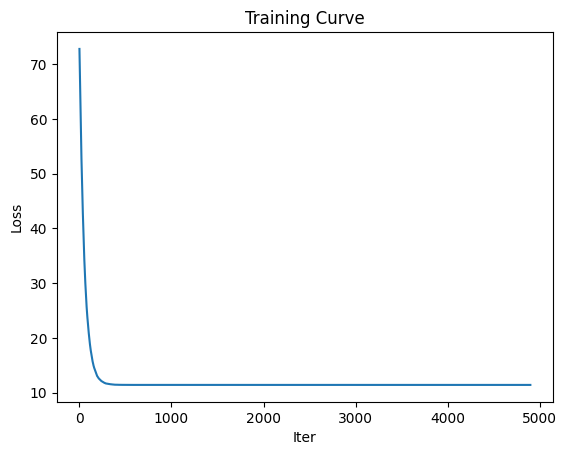

In [85]:
loss_history = loss_history[100:] # it is okay to remove this line

# plot training curve
plt.plot(range(len(loss_history)), loss_history)
plt.title("Training Curve")
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.show()